# Data Analysis The Wind Turbine Project

You will learn how to use the Pandas python library to analyse data

### Table of Contents

* [Loading Data One File](#chapter1)
    * [Loading libreraies](#section_1_1)
    * [Finding files ](#section_1_2)
    * [Read First files](#section_1_3)
    * [Plots](#section_1_4)
    * [Resample Data](#section_1_5)
    * [Do the computationss](#section_1_6)
    * [Get absolute mean value](#section_1_7)
* [Work with all the files](#chapter2)
    * [Read, Compute and Join](#section_2_1) 
    * [Get final values](#section_2_2)
    * [Final plots](#section_2_2)

## Loading Data One File <a class="anchor" id="chapter1"></a>

### Loading libreraies <a class="anchor" id="section_1_1"></a>

Phyton works with many different libraries, each libreary allow us to perform different task. In the Data Science world, one of the most popular and powerful library is Pandas (https://pandas.pydata.org/). In this notebook, we will use mainly this library to see how can we process, manipulate and easily analyse a lot of data. 

In [1]:
# Pandas is similar to excel so you can work with Data Frames
import pandas as pd
#OS refers to the operative system
import os
#Get the pi constant value
from math import pi

### Finding files<a class="anchor" id="section_1_2"></a>

In the case we have many different files in one (our case) or many different directories, the first thing we need to do, is to retrieve all these documents.

In [2]:
#Get the list of files in the working directory
All_files=os.listdir('.')
print(All_files)

['.ipynb_checkpoints', 'TA001.csv', 'TA002.csv', 'TA003.csv', 'TA004.csv', 'TA005.csv', 'TA006.csv', 'TA007.csv', 'TA008.csv', 'TA009.csv', 'TA010.csv', 'TA011.csv', 'TA012.csv', 'TA013.csv', 'TA014.csv', 'TA015.csv', 'TA016.csv', 'Untitled.ipynb', 'zero004.csv', 'zero005.csv', 'zero006.csv', 'Zero201808140001.csv', 'Zero201808140002.csv']


In [3]:
# Select just the TAXXX.csv files 
TA_files= [f for f in All_files if ('TA'  in f) and (f.endswith('.csv'))]
print(TA_files)

['TA001.csv', 'TA002.csv', 'TA003.csv', 'TA004.csv', 'TA005.csv', 'TA006.csv', 'TA007.csv', 'TA008.csv', 'TA009.csv', 'TA010.csv', 'TA011.csv', 'TA012.csv', 'TA013.csv', 'TA014.csv', 'TA015.csv', 'TA016.csv']


### Read First file<a class="anchor" id="section_1_3"></a>

From this point we will start to analyze one single file, we will try to extract the data that is inside this file. The idea is to try to figure out what type of data are we dealing with, the integrity of the data and make ourselves a general idea of the data. 

In [4]:
#Read the first file
# Phyton reads from 0
data_exp=pd.read_csv(TA_files[0])
#Explore the data
data_exp.head()

,Time,RPM,TRQU
0,0.000000,inf,-10.994894
1,0.003906,90.043968,-11.167003
2,0.007812,89.062500,-10.904742
3,0.011719,89.956078,-11.220274
4,0.015625,90.043968,-11.585353


In [5]:
#Explore the data type
data_exp.dtypes

Time    float64
RPM     float64
TRQU    float64
dtype: object

In [6]:
#Check how many data point we have rows, columns
data_exp.shape

(76800, 3)

In [7]:
#See the basic information of the Data frame
data_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76800 entries, 0 to 76799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    76800 non-null  float64
 1   RPM     76800 non-null  float64
 2   TRQU    76800 non-null  float64
dtypes: float64(3)
memory usage: 1.8 MB


In [8]:
# Define Infinity values as "Not a Number".
pd.set_option('use_inf_as_na', True)

In [9]:
#Delete all Na values
data_exp.dropna(inplace=True)

In [10]:
#Check how many data point we have rows, columns
data_exp.shape

(76799, 3)

In [11]:
#Describe the Data Frame
data_exp.describe()

,Time,RPM,TRQU
count,76799.000000,76799.000000,76799.000000
mean,150.000000,89.815969,-13.368563
std,86.601977,1.381705,1.964682
min,0.003906,83.274857,-40.590091
25%,75.001953,89.062500,-14.175920
50%,150.000000,90.000000,-13.384668
75%,224.998047,90.937500,-12.589319
max,299.996094,95.625000,15.841724


### Plots <a class="anchor" id="section_1_4"></a>

<AxesSubplot:>

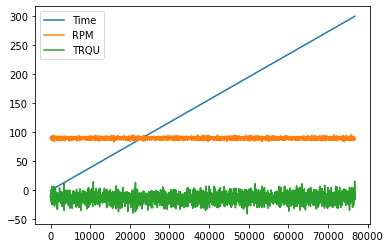

In [12]:
data_exp.plot()

In [13]:
#Lests convert Column "Time" into seconds
data_exp['Time']=pd.to_timedelta(data_exp['Time'], unit='seconds') 

In [14]:
#Make the time to be our index
data_exp.set_index('Time',inplace=True)

In [15]:
data_exp.head()

,RPM,TRQU
Time,,
0 days 00:00:00.003906250,90.043968,-11.167003
0 days 00:00:00.007812500,89.062500,-10.904742
0 days 00:00:00.011718750,89.956078,-11.220274
0 days 00:00:00.015625,90.043968,-11.585353
0 days 00:00:00.019531250,89.956078,-11.585353


<AxesSubplot:xlabel='Time'>

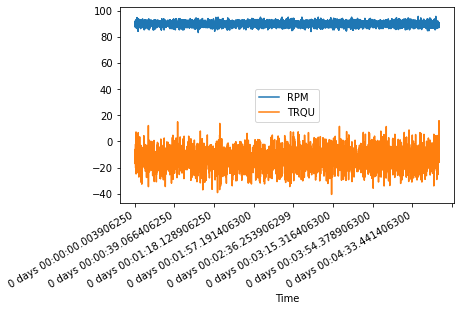

In [16]:
data_exp.plot()

<AxesSubplot:xlabel='Time'>

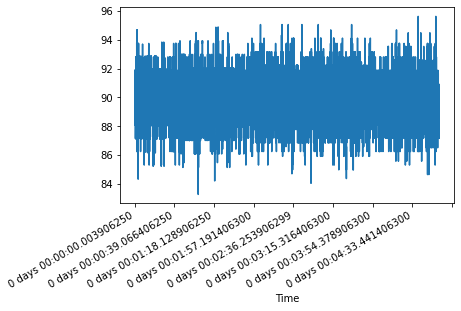

In [17]:
data_exp.RPM.plot()

<AxesSubplot:xlabel='Time'>

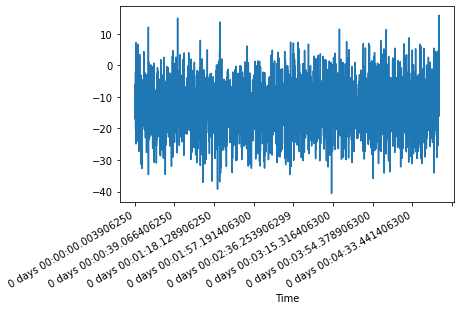

In [18]:
data_exp.TRQU.plot()

array([[<AxesSubplot:title={'center':'RPM'}>,
        <AxesSubplot:title={'center':'TRQU'}>]], dtype=object)

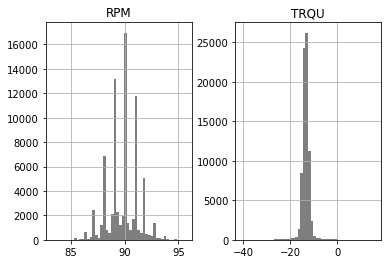

In [19]:
data_exp.hist(color="k", alpha=0.5, bins=50)

array([[<AxesSubplot:title={'center':'RPM'}>,
        <AxesSubplot:title={'center':'TRQU'}>]], dtype=object)

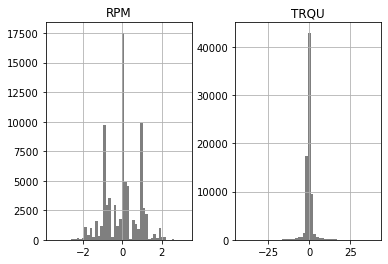

In [20]:
#Plot the difference between 2 consecutive values
data_exp.diff().hist(color="k", alpha=0.5, bins=50)

In [21]:
#Lest find where these big jumps occurs
data_exp.diff().abs().idxmax()

RPM    0 days 00:02:34.917968800
TRQU   0 days 00:01:23.585937500
dtype: timedelta64[ns]

In [22]:
#Lest find where the value of those big jumps
data_exp.diff().max()

RPM      3.176476
TRQU    39.678812
dtype: float64

In [23]:
#Put the values into a variable
Ind_max=data_exp.diff().abs().idxmax()

<AxesSubplot:xlabel='Time'>

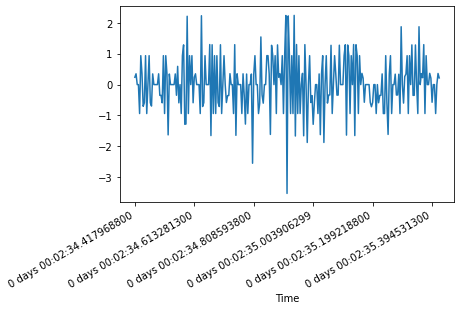

In [24]:
#Plot 0.5 seconds before and after the max values
data_exp.diff().RPM[Ind_max[0]-pd.Timedelta(0.5,'seconds'):Ind_max[0]+pd.Timedelta(0.5,'seconds')].plot()

<AxesSubplot:xlabel='Time'>

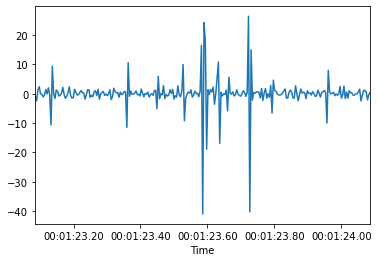

In [25]:
#Plot 10 seconds before and after the max values
data_exp.diff().TRQU[Ind_max[1]-pd.Timedelta(0.5,'seconds'):Ind_max[1]+pd.Timedelta(0.5,'seconds')].plot()

<AxesSubplot:ylabel='Frequency'>

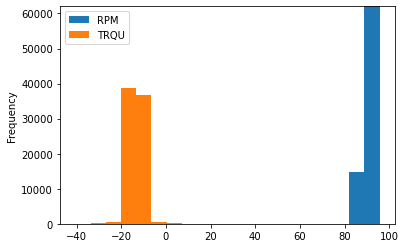

In [26]:
data_exp.plot.hist(stacked=True, bins=20)

<AxesSubplot:>

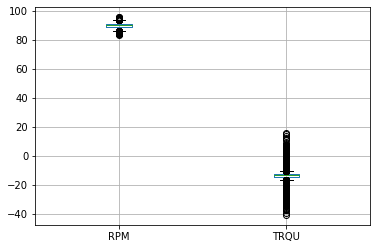

In [27]:
data_exp.boxplot()

array([[<AxesSubplot:xlabel='RPM', ylabel='RPM'>,
        <AxesSubplot:xlabel='TRQU', ylabel='RPM'>],
       [<AxesSubplot:xlabel='RPM', ylabel='TRQU'>,
        <AxesSubplot:xlabel='TRQU', ylabel='TRQU'>]], dtype=object)

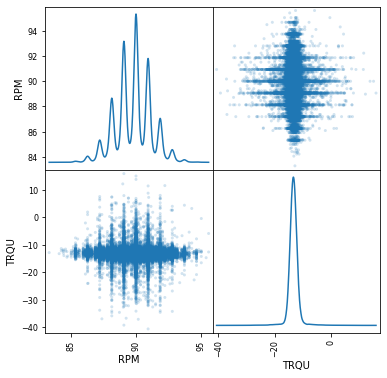

In [28]:
pd.plotting.scatter_matrix(data_exp,alpha=0.2, figsize=(6, 6), diagonal="kde")

For more plots check https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

### Resample Data <a class="anchor" id="section_1_5"></a>

In [29]:
data_exp.resample('1S').mean()

,RPM,TRQU
Time,,
0 days 00:00:00.003906250,89.692392,-11.202924
0 days 00:00:01.003906250,90.303957,-11.287820
0 days 00:00:02.003906250,90.080586,-13.033519
0 days 00:00:03.003906250,89.890164,-12.288385
0 days 00:00:04.003906250,90.278315,-13.369821
...,...,...
0 days 00:04:55.003906250,90.081341,-13.092642
0 days 00:04:56.003906250,90.106774,-13.217369
0 days 00:04:57.003906250,90.019026,-14.051275


<AxesSubplot:xlabel='Time'>

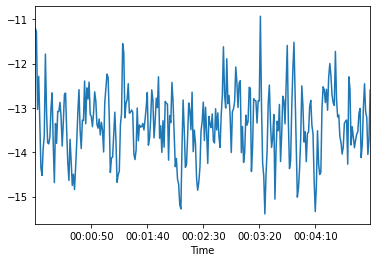

In [30]:
data_exp.TRQU.resample('1S').mean().plot()

### Do the computations <a class="anchor" id="section_1_6"></a>

In [31]:
#Create a new colums
data_exp['Rad_per_s']=data_exp.RPM*2*pi/60
data_exp['Rad_per_s'].head()

Time
0 days 00:00:00.003906250    9.429382
0 days 00:00:00.007812500    9.326603
0 days 00:00:00.011718750    9.420178
0 days 00:00:00.015625       9.429382
0 days 00:00:00.019531250    9.420178
Name: Rad_per_s, dtype: float64

In [32]:
data_exp['Tip_Speed']=0.6*data_exp['Rad_per_s']
data_exp['TSR']=data_exp['Tip_Speed']/0.8
data_exp['Power']=abs(data_exp.TRQU*data_exp.Rad_per_s)
data_exp['Cp']=data_exp['Power']/(0.5*1000*pi*0.6**2*0.8**3)

In [33]:
data_exp.head()

,RPM,TRQU,Rad_per_s,Tip_Speed,TSR,Power,Cp
Time,,,,,,,
0 days 00:00:00.003906250,90.043968,-11.167003,9.429382,5.657629,7.072037,105.297938,0.363687
0 days 00:00:00.007812500,89.062500,-10.904742,9.326603,5.595962,6.994952,101.704205,0.351274
0 days 00:00:00.011718750,89.956078,-11.220274,9.420178,5.652107,7.065134,105.696987,0.365065
0 days 00:00:00.015625,90.043968,-11.585353,9.429382,5.657629,7.072037,109.242721,0.377312
0 days 00:00:00.019531250,89.956078,-11.585353,9.420178,5.652107,7.065134,109.136091,0.376943


### Get absolute mean value <a class="anchor" id="section_1_7"></a>

In [34]:
data_exp.abs().mean()

RPM           89.815969
TRQU          13.380836
Rad_per_s      9.405506
Tip_Speed      5.643304
TSR            7.054130
Power        125.859835
Cp             0.434705
dtype: float64

## Work with all the files  <a class="anchor" id="chapter2"></a>

###  Read, Compute and Join <a class="anchor" id="section_2_1"></a>

In [35]:
#Create List to allocate all the files
All_files = []
#Create sufix value
i=1
#Iterate throw all the files
for filename in TA_files:
    #read the file
    df = pd.read_csv(filename,index_col=['Time'])
    df.dropna(inplace=True)
    df['Rad_per_s']=df.RPM*2*pi/60
    df['Tip_Speed']=0.6*df['Rad_per_s']
    df['TSR']=df['Tip_Speed']/0.8
    df['Power']=abs(df.TRQU*df.Rad_per_s)
    df['Cp']=df['Power']/(0.5*1000*pi*0.6**2*0.8**3)
    #Append the file addinf the suffix
    All_files.append(df.add_suffix('_'+str(i)))
    #Increas the sufix
    i+=1
#Join all the files into one
frame = pd.concat(All_files, axis=1)

In [36]:
frame.head()

,RPM_1,TRQU_1,Rad_per_s_1,Tip_Speed_1,TSR_1,Power_1,Cp_1,RPM_2,TRQU_2,Rad_per_s_2,...,TSR_15,Power_15,Cp_15,RPM_16,TRQU_16,Rad_per_s_16,Tip_Speed_16,TSR_16,Power_16,Cp_16
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,NaN,-10.994894,NaN,NaN,NaN,NaN,NaN,NaN,-10.646580,NaN,...,NaN,NaN,NaN,NaN,-10.646219,NaN,NaN,NaN,NaN,NaN
0.003906,90.043968,-11.167003,9.429382,5.657629,7.072037,105.297938,0.363687,51.764706,-20.127816,5.420787,...,6.037748,108.869726,0.376023,103.657585,-9.699250,10.854997,6.512998,8.141248,105.285331,0.363643
0.007812,89.062500,-10.904742,9.326603,5.595962,6.994952,101.704205,0.351274,50.625000,-21.226032,5.301438,...,6.037748,97.155702,0.335564,104.470596,-9.363229,10.940135,6.564081,8.205101,102.434992,0.353799
0.011719,89.956078,-11.220274,9.420178,5.652107,7.065134,105.696987,0.365065,51.562500,-20.648239,5.399612,...,6.037748,90.060110,0.311057,104.062500,-9.846772,10.897400,6.538440,8.173050,107.304205,0.370616
0.015625,90.043968,-11.585353,9.429382,5.657629,7.072037,109.242721,0.377312,50.625000,-20.185186,5.301438,...,5.964117,91.373217,0.315592,103.657585,-10.383959,10.854997,6.512998,8.141248,112.717838,0.389314


In [37]:
frame.shape

(76800, 112)

###  Get final values <a class="anchor" id="section_2_2"></a>

In [38]:
#Get all the mean values
mean_val=frame.abs().mean()

In [39]:
mean_val

RPM_1            89.815969
TRQU_1           13.380804
Rad_per_s_1       9.405506
Tip_Speed_1       5.643304
TSR_1             7.054130
                   ...    
Rad_per_s_16     10.752537
Tip_Speed_16      6.451522
TSR_16            8.064403
Power_16        115.700474
Cp_16             0.399616
Length: 112, dtype: float64

In [40]:
#Get the TSR and Cp columns
TSR_col=[c for c in frame.columns if ('TSR'  in c) ]
Cp_col=[c for c in frame.columns if ('Cp'  in c) ]

In [41]:
TSR_col,Cp_col

(['TSR_1',
  'TSR_2',
  'TSR_3',
  'TSR_4',
  'TSR_5',
  'TSR_6',
  'TSR_7',
  'TSR_8',
  'TSR_9',
  'TSR_10',
  'TSR_11',
  'TSR_12',
  'TSR_13',
  'TSR_14',
  'TSR_15',
  'TSR_16'],
 ['Cp_1',
  'Cp_2',
  'Cp_3',
  'Cp_4',
  'Cp_5',
  'Cp_6',
  'Cp_7',
  'Cp_8',
  'Cp_9',
  'Cp_10',
  'Cp_11',
  'Cp_12',
  'Cp_13',
  'Cp_14',
  'Cp_15',
  'Cp_16'])

In [42]:
final=pd.DataFrame({'TSR':mean_val[TSR_col].values,'Cp':mean_val[Cp_col].values})

In [43]:
final

,TSR,Cp
0,7.054130,0.434705
1,4.039502,0.390468
2,11.094922,0.254022
3,5.553937,0.441345
4,6.059034,0.439666
5,3.534362,0.271997
6,13.115196,0.092588
7,9.074380,0.370052
8,4.544573,0.427538
9,10.084589,0.311385


###  Final plots <a class="anchor" id="section_2_3"></a>

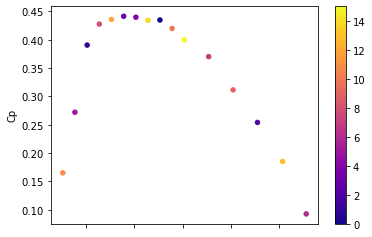

In [44]:
ax=final.plot.scatter(x='TSR', y='Cp',c=final.index,colormap='plasma',xlabel='TSR')

More color maps at https://matplotlib.org/stable/tutorials/colors/colormaps.html

<AxesSubplot:title={'center':'Final Plot'}, xlabel='TSR', ylabel='Cp'>

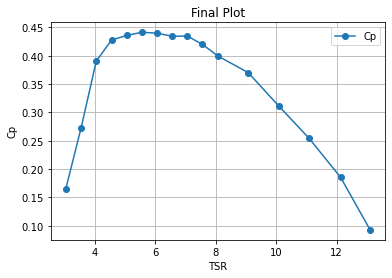

In [45]:
final.sort_values(by=['TSR']).plot(x='TSR', y='Cp',title='Final Plot',grid=True,ylabel='Cp',marker='o')

We hope you like it